In [214]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
import statsmodels as sm

In [215]:
#Loading data
data = pd.read_csv('polls_us_election_2016.csv')
data.head()

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN
3,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN


In [216]:
#Function to convert time
def convert_time_to_int(data, column):
    new_column = []
    for elem in data[column]:
        new_column.append(datetime.fromisoformat(elem).timestamp())
    data[column] = new_column
    data[column] = data[column] - min(new_column)
    return min(new_column)
min_start_date = convert_time_to_int(data, 'startdate')
min_end_date = convert_time_to_int(data, 'enddate')

In [217]:
datetime.fromisoformat('2016-11-03').timestamp()

1478145600.0

In [218]:
data

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,U.S.,31359600.0,31446000.0,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN
1,U.S.,31186800.0,31536000.0,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN
2,U.S.,31273200.0,31446000.0,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN
3,U.S.,31446000.0,31536000.0,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN
4,U.S.,31359600.0,31446000.0,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,Virginia,27212400.0,27558000.0,Ipsos,A-,452.0,lv,46.54,40.04,NaN,NaN,46.47852,40.48017,NaN,NaN
4204,Wisconsin,23497200.0,23583600.0,Marquette University,A,683.0,lv,47.00,34.00,9.00,NaN,48.74781,39.07778,4.705020,NaN
4205,Utah,31186800.0,31536000.0,Google Consumer Surveys,B,286.0,lv,21.33,35.05,9.99,NaN,26.65200,40.57738,9.705791,NaN
4206,Oregon,30236400.0,31100400.0,Ipsos,A-,446.0,lv,46.46,37.41,NaN,NaN,45.12949,37.10720,NaN,NaN


In [219]:
startdates=data['startdate']
len(startdates.unique()) / len(startdates)

0.08365019011406843

In [220]:
(31446000.0 - 31359600.0) / 3

28800.0

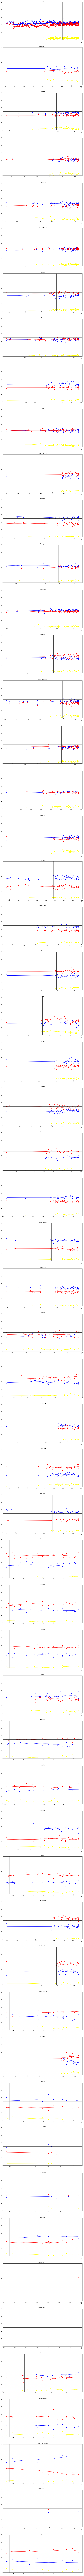

In [221]:
fig, axs = plt.subplots(57, figsize=(15, 500))
counter = 0
for state in data['state'].unique():
    d2 = data[data['state'] == state].sort_values(by="enddate").copy()
    d2 = d2[(d2['grade'] == 'A+') | (d2['grade'] == 'A') | (d2['grade'] == 'A-') | (d2['grade'] == 'B+') | (d2['grade'] == 'B') | (d2['grade'] == 'B-')]
    d2['rolling_clinton'] = d2[['adjpoll_clinton']].rolling(window=10, center=True, min_periods=2).mean()['adjpoll_clinton']
    d2['rolling_trump'] = d2[['adjpoll_trump']].rolling(window=10, center=True, min_periods=2).mean()['adjpoll_trump']
    d2['rolling_johnson'] = d2[['adjpoll_johnson']].rolling(window=10, center=True, min_periods=2).mean()['adjpoll_johnson']
    axs[counter].plot(d2['enddate'], d2['rolling_clinton'], color="blue")
    axs[counter].plot(d2['enddate'], d2['rolling_trump'], color='red')
    axs[counter].plot(d2['enddate'], d2['rolling_johnson'], color='yellow')
    axs[counter].scatter(d2['enddate'], d2['adjpoll_clinton'], color="blue")
    axs[counter].scatter(d2['enddate'], d2['adjpoll_trump'], color="red")
    axs[counter].scatter(d2['enddate'], d2['adjpoll_johnson'], color="yellow")
    axs[counter].axhline(y=50, color="black", linestyle="-")
    axs[counter].axvline(x=(datetime.fromisoformat('2016-08-17').timestamp() - min_start_date), color="black", linestyle="-")
    axs[counter].set_title(state)
    axs[counter].set_ylim([0,100])
    counter += 1

American elections work on the electoral college, therefore the prediction for who would win needs to include some kind of simulation of the electoral college.
https://en.wikipedia.org/wiki/United_States_Electoral_College
This can be simulated as P(R >= 270) = \sum{x \in ec_state} P(R_x > 50) or P(D > 270) = \sum{x \in ec_state} P(D_x >= 50)

In [222]:
ecr = {
    "Alabama" : 9,
    "Alaska" : 3,
    "Arizona" : 11,
    "Arkansas" : 6,
    "California" : 54,
    "Colorado" : 10,
    "Connecticut" : 7,
    "Delaware" : 3,
    "District of Columbia" : 3,
    "Florida" : 30,
    "Georgia" : 16,
    "Hawaii" : 4,
    "Idaho" : 4,
    "Illinois" : 19,
    "Indiana" : 11,
    "Iowa" : 6,
    "Kansas" : 6,
    "Kentucky" : 8,
    "Louisiana" : 8,
    "Maine" : 2,
    "Maine CD-1" : 1,
    "Maine CD-2" : 1,
    "Maryland" : 10,
    "Massachusetts" : 11,
    "Michigan" : 15,
    "Minnesota" : 10,
    "Mississippi" : 6,
    "Missouri" : 10,
    "Montana" : 4,
    "Nebraska" : 2,
    "Nebraska CD-1" : 1,
    "Nebraska CD-2" : 1,
    "Nebraska CD-3" : 1,
    "Nevada" : 6,
    "New Hampshire" : 4,
    "New Jersey" : 14,
    "New Mexico" : 5,
    "New York" : 28,
    "North Carolina" : 16,
    "North Dakota" : 3,
    "Ohio" : 17,
    "Oklahoma" : 7,
    "Oregon" : 8,
    "Pennsylvania" : 19,
    "Rhode Island" : 4,
    "South Carolina" : 9,
    "South Dakota" : 3,
    "Tennessee" : 11,
    "Texas" : 40,
    "Utah" : 6,
    "Vermont" : 3,
    "Virginia" : 13,
    "Washington" : 12,
    "West Virginia" : 4,
    "Wisconsin" : 10,
    "Wyoming" : 3
}
#https://en.wikipedia.org/wiki/2012_United_States_presidential_election
past_elections = {
    "U.S." : 0.5106,
    "Alabama" : 0.3836,
    "Alaska" : 0.4081,
    "Arizona" : 0.4459,
    "Arkansas" : 0.3688,
    "California" : 0.6024,
    "Colorado" : 0.5149,
    "Connecticut" : 0.5806,
    "Delaware" : 0.5861,
    "District of Columbia" : 0.9091,
    "Florida" : 0.5001,
    "Georgia" : 0.4548,
    "Hawaii" : 0.7055,
    "Idaho" : 0.3204,
    "Illinois" : 0.5760,
    "Indiana" : 0.4393,
    "Iowa" : 0.5199,
    "Kansas" : 0.3805,
    "Kentucky" : 0.3780,
    "Louisiana" : 0.4058,
    "Maine" : 0.5627,
    "Maine CD-1" : 0.5957,
    "Maine CD-2" : 0.5294,
    "Maryland" : 0.6197,
    "Massachusetts" : 0.6065,
    "Michigan" : 0.5421,
    "Minnesota" : 0.5265,
    "Mississippi" : 0.4379,
    "Missouri" : 0.4438,
    "Montana" : 0.4170,
    "Nebraska" : 0.3803,
    "Nebraska CD-1" : 0.4083,
    "Nebraska CD-2" : 0.4570,
    "Nebraska CD-3" : 0.2782,
    "Nevada" : 0.5236,
    "New Hampshire" : 0.5198,
    "New Jersey" : 0.5838,
    "New Mexico" : 0.5299,
    "New York" : 0.6335,
    "North Carolina" : 0.4835,
    "North Dakota" : 0.3870,
    "Ohio" : 0.5067,
    "Oklahoma" : 0.3323,
    "Oregon" : 0.5424,
    "Pennsylvania" : 0.5197,
    "Rhode Island" : 0.6270,
    "South Carolina" : 0.4409,
    "South Dakota" : 0.3987,
    "Tennessee" : 0.3908,
    "Texas" : 0.4138,
    "Utah" : 0.2469,
    "Vermont" : 0.6657,
    "Virginia" : 0.5116,
    "Washington" : 0.5616,
    "West Virginia" : 0.3554,
    "Wisconsin" : 0.5283,
    "Wyoming" : 0.2782
}

In [223]:
adj_data = data.copy()
result = []
for state in data['state']:
    result.append(past_elections[state] > 0.5)
adj_data['Y'] = result
adj_data.head()

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,Y
0,U.S.,31359600.0,31446000.0,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN,True
1,U.S.,31186800.0,31536000.0,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN,True
2,U.S.,31273200.0,31446000.0,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN,True
3,U.S.,31446000.0,31536000.0,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN,True
4,U.S.,31359600.0,31446000.0,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN,True


In [224]:
data['rawpoll_clinton'].rolling(30).mean()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4203    42.021667
4204    42.221667
4205    41.132667
4206    41.781333
4207    41.714667
Name: rawpoll_clinton, Length: 4208, dtype: float64

In [225]:
for elem in data[data['state'] != "U.S."].sort_values(by='startdate')['startdate']:
    print(elem)

0.0
86400.0
259200.0
345600.0
345600.0
345600.0
432000.0
518400.0
777600.0
777600.0
864000.0
1987200.0
2073600.0
2419200.0
2505600.0
2764800.0
2937600.0
4924800.0
4924800.0
5097600.0
5184000.0
5443200.0
5529600.0
5788800.0
5875200.0
6048000.0
6307200.0
6307200.0
6307200.0
6566400.0
6739200.0
7344000.0
7430400.0
7603200.0
7689600.0
7776000.0
7862400.0
8380800.0
8380800.0
8640000.0
8640000.0
8726400.0
8812800.0
8985600.0
8985600.0
9072000.0
9158400.0
9244800.0
9244800.0
9331200.0
9331200.0
9504000.0
9504000.0
9676800.0
9849600.0
10022400.0
10022400.0
10022400.0
10108800.0
10108800.0
10195200.0
10195200.0
10281600.0
10281600.0
10281600.0
10281600.0
10281600.0
10281600.0
10540800.0
10627200.0
10713600.0
11059200.0
11142000.0
11142000.0
11314800.0
11401200.0
11487600.0
11574000.0
11660400.0
11833200.0
11919600.0
11919600.0
11919600.0
12006000.0
12006000.0
12351600.0
12351600.0
12351600.0
12524400.0
12524400.0
12524400.0
12524400.0
12610800.0
12697200.0
12697200.0
12956400.0
12956400.0
12956

30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
30927600.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0
31014000.0

In [226]:
def find_latest_national_poll(df, current_time):
    min_diff = -1
    best_val = None
    for _, row in df.iterrows():
        time = row['startdate']
        new_diff = abs(current_time - time)
        if min_diff < 0:
            min_diff = new_diff
            best_val = row['rawpoll_clinton']
        elif min_diff > new_diff:
            min_diff = new_diff
            best_val = row['rawpoll_clinton']
    if best_val == None:
        return 0
    return best_val

def find_weighted_mean(poll, samplesize):
    somme = 0
    total = 0
    for i in range(len(poll)):
        somme += poll[i] * samplesize[i]
        total += samplesize[i]
    return somme / total

def find_weighted_variance(grades, samplesize, grades_dict):
    somme = 0
    total = 0
    for i in range(len(grades)):
        try:
            grade = grades_dict[grades[i]]
        except:
            grade = grades_dict['nan']
        somme += (samplesize[i] ** 2) * grade
        total += samplesize[i]
    return somme / total

def poll_transform1(df, ecr, past_elections, grades_dict, poll_range, column_c, column_t):
    all_poll_times = df[df['state'] != "U.S."].sort_values(by='enddate')['enddate'].unique()
    pbar = tqdm(total = len(all_poll_times), desc="Loading", position=0)
    times = []
    votes_timeline = []
    new_elections = past_elections.copy()
    for time in all_poll_times:
        times.append(time)
        votes = 0
        new_df = df[df['enddate'] <= time]
        new_df = new_df[new_df['enddate'] > (time - poll_range)]
        for state in ecr.keys():
            current_df = new_df[new_df['state'] == state]
            clinton = current_df[column_c]
            trump = current_df[column_t]
            if len(clinton) > 1 and len(trump) > 1:
                mean = clinton.mean() - trump.mean()
                var = clinton.var() + trump.var()
                if var != 0:
                    prob = 1 - stats.norm.cdf(0, loc=mean, scale=var)
                    votes += (prob > 0.5) * ecr[state]
                    new_elections[state] = prob
                else:
                    votes += ecr[state] * (new_elections[state] > 0.5)
            else:
                votes += ecr[state] * (new_elections[state] > 0.5)
            '''
                var = 0
                if len(clinton) > 1 and len(trump) > 1:
                    mean = clinton.mean() - trump.mean()
                    for elem in current_df['grade']:
                        try:
                            var += grades_dict[elem]
                        except:
                            var += 1
                    if var != 0:
                        prob = 1 - stats.norm.cdf(0, loc=mean, scale=var)
                        states_results[state] = prob
                        votes += prob * ecr[state]
                    else:
                        votes += ecr[state] * (mean / 100 > 0.5)
                else:
                    votes += ecr[state] * (past_elections[state] > 0.5)
            '''
            '''
            current_df = new_df[new_df['state'] == state].reset_index(drop=True)
            clinton = current_df['adjpoll_clinton']
            trump = current_df['adjpoll_trump']
            if len(clinton) > 1 and len(trump) > 1:
                mean = find_weighted_mean(current_df['adjpoll_clinton'], current_df['samplesize']) - find_weighted_mean(current_df['adjpoll_trump'], current_df['samplesize'])
                var = 2 * find_weighted_variance(current_df['grade'], current_df['samplesize'], grades_dict)
                if var != 0:
                    prob = 1 - stats.norm.cdf(0, loc=mean, scale=var)
                    votes += (prob > 0.5) * ecr[state]
                    new_elections[state] = prob
                else:
                    votes += ecr[state] * (new_elections[state] > 0.5)
            else:
                votes += ecr[state] * (new_elections[state] > 0.5)
            '''
        pbar.update(1)
        votes_timeline.append(votes)
    return pd.DataFrame({"times" : times, "votes_timeline" : votes_timeline}), new_elections

In [227]:
grades_dict = {"A+" : 10 ** (-6),
               "A" : 10 ** (-5),
               "A-" : 10 ** (-4),
               "B+" : 10 ** (-3),
               "B" : 10 ** (-2),
               "B-" : 10 ** (-1),
               "C+" : 10 ** (-5),
               "C" : 10 ** (-4),
               "C-" : 10 ** (-3),
               "D" : 10 ** (-2),
               "nan" : 10 ** (-1)}
new_data = data[(data['grade'] == 'A+') | (data['grade'] == 'A') | (data['grade'] == 'A-') | (data['grade'] == 'B+') | (data['grade'] == 'B') | (data['grade'] == 'B-')]
votes_timeline_df, states_results = poll_transform1(new_data, ecr, past_elections, grades_dict, 28800.0 * 14, 'rawpoll_clinton', 'rawpoll_trump')

Loading: 100%|████████████████████████████████| 207/207 [00:02<00:00, 91.62it/s]


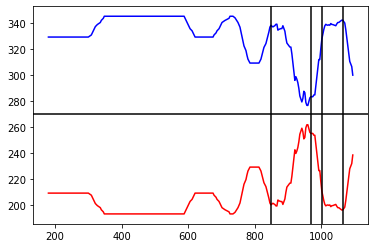

In [228]:
plt.plot(votes_timeline_df['times'] / 28800.0, votes_timeline_df['votes_timeline'].rolling(10).mean(), color="blue")
plt.plot(votes_timeline_df['times'] / 28800.0, 538 - votes_timeline_df['votes_timeline'].rolling(10).mean(), color="red")
plt.axhline(y=270, color="black", linestyle="-")
#Don't know what happened, needs further investigation
#Seems to be when polling starts to ramp up
plt.axvline(x=(datetime.fromisoformat('2016-08-17').timestamp() - min_end_date) / 28800, color="black", linestyle="-")
#First presidential debate
plt.axvline(x=(datetime.fromisoformat('2016-09-26').timestamp() - min_end_date) / 28800, color="black", linestyle="-")
#Access Hollywood tapes
plt.axvline(x=(datetime.fromisoformat('2016-10-07').timestamp() - min_end_date) / 28800, color="black", linestyle="-")
#Comey investigation
plt.axvline(x=(datetime.fromisoformat('2016-10-28').timestamp() - min_end_date) / 28800, color="black", linestyle="-")

Election day was November 8th and the last poll was conducted on November 3rd (1478145600.0)

In [229]:
states_results

{'U.S.': 0.5106,
 'Alabama': 0.39001933091000973,
 'Alaska': 0.46755903487093553,
 'Arizona': 0.4680719498476441,
 'Arkansas': 0.29848192012259633,
 'California': 0.7331287658492975,
 'Colorado': 0.5840806145378371,
 'Connecticut': 0.5678945847228258,
 'Delaware': 0.6812536618901577,
 'District of Columbia': 0.5658105144310531,
 'Florida': 0.497461614911625,
 'Georgia': 0.3776784854577062,
 'Hawaii': 0.9483624769679092,
 'Idaho': 0.4138997168223295,
 'Illinois': 0.584671789644207,
 'Indiana': 0.4228150428056714,
 'Iowa': 0.49428046488167066,
 'Kansas': 0.4718500035055143,
 'Kentucky': 0.3732108206772632,
 'Louisiana': 0.3709385886070551,
 'Maine': 0.5603673945367198,
 'Maine CD-1': 0.5957,
 'Maine CD-2': 0.5294,
 'Maryland': 0.7331225819976148,
 'Massachusetts': 0.7152064712277335,
 'Michigan': 0.5438888753349163,
 'Minnesota': 0.6116023828855142,
 'Mississippi': 0.369496284303529,
 'Missouri': 0.43221735066792966,
 'Montana': 0.4330081384211002,
 'Nebraska': 0.3235829558350569,
 'Nebr

In [230]:
states = list(states_results.keys())
date = [1478145600.0] * len(states)

In [231]:
pd.DataFrame({"state" : states, "startdate" : date}).to_csv('Predictions.csv', index=False)

In [232]:
states

['U.S.',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maine CD-1',
 'Maine CD-2',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nebraska CD-1',
 'Nebraska CD-2',
 'Nebraska CD-3',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

Trying to include samplesize and grade to weigh different polls and turn them into random variables

In [233]:
def conv_poll_to_rv(data, index, grades_dict):
    mean = data['rawpoll_clinton'][index]
    variance = grades_dict[data['grades'][index]] / data['samplesize'][index]
    return mean, variance

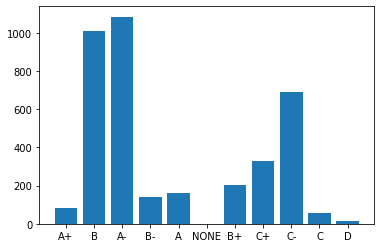

In [234]:
grades_dict = {}
for grade in data['grade'].unique():
    grades_dict[grade] = len(data[data['grade'] == str(grade)])
values = list(grades_dict.keys())
values[5] = "NONE"
plt.bar(values, list(grades_dict.values()))
plt.show()

In [235]:
import requests
import re

In [236]:
response = requests.get("https://projects.fivethirtyeight.com/pollster-ratings/")
response.status_code

200

In [237]:
string = ''
for pollster in data['pollster'].unique():
    string += pollster + "|"
string = string[:-1]
string

"ABC News/Washington Post|Google Consumer Surveys|Ipsos|YouGov|Gravis Marketing|Fox News/Anderson Robbins Research/Shaw & Company Research|CBS News/New York Times|NBC News/Wall Street Journal|Zia Poll|IBD/TIPP|Selzer & Company|Angus Reid Global|Monmouth University|Public Policy Polling|Marist College|The Times-Picayune/Lucid|Marquette University|Siena College|Landmark Communications|Quinnipiac University|USC Dornsife/LA Times|RKM Research and Communications, Inc.|Remington|Christopher Newport University|Emerson College|CVOTER International|Morning Consult|SurveyMonkey|Clarity Campaign Labs|University of New Hampshire|Pew Research Center|SurveyUSA|Rasmussen Reports/Pulse Opinion Research|Greenberg Quinlan Rosner/American Viewpoint|Saguaro Strategies|Hampton University|Insights West|CNN/Opinion Research Corp.|Trafalgar Group|RAND (American Life Panel)|RABA Research|GfK Group|EPIC-MRA|BK Strategies|Public Policy Institute of California|Columbus Dispatch|Keating Research, Inc.|Opinion Savv

In [238]:
poll_values = re.findall("<[^<>]*>([^<>]*)<[^<>]*>", response.text)
new_poll_values = []
for elem in poll_values:
    if elem != "":
        new_poll_values.append(elem)

In [239]:
pollsters_skew = {}
has_key = False
for elem in new_poll_values[10:]:
    if re.match(".*(" + string + ").*", elem) and not has_key:
        new_key = elem
        has_key = True
    elif re.match("^[R|D]\+\d\.\d$", elem) and has_key:
        has_key = False
        if elem[0] == 'R':
            pollsters_skew[new_key] = float(elem[2:])
        elif elem[0] == 'D':
            pollsters_skew[new_key] = -1 * float(elem[2:])
pollsters_skew

{'University of New Hampshire Survey Center': -2.0,
 'Monmouth University': -2.1,
 'Trafalgar Group': 2.4,
 'Ipsos': -1.8,
 'Suffolk University': -0.8,
 'Public Opinion Strategies': -0.1,
 'Mitchell Research & Communications': -0.9,
 'Morning Consult': -3.1,
 'EPIC-MRA': -0.1,
 'We Ask America': 0.8,
 'Remington Research Group': -1.2,
 'Landmark Communications': -0.9,
 'Dan Jones & Associates': -0.8,
 'Princeton Survey Research Associates International': -0.4,
 'Muhlenberg College': 0.2,
 'Garin-Hart-Yang Research Group': -1.9,
 'The Tarrance Group': 0.7,
 'Angus Reid Global': 1.1,
 'Tarrance Group': 0.9,
 'University of Massachusetts Lowell Center for Public Opinion': -0.7,
 'McLaughlin & Associates': 1.6,
 'Market Research Insight': 0.5,
 'Global Strategy Group': -1.8,
 'SoonerPoll.com': -2.9,
 'Franklin & Marshall College': -0.6,
 'Pew Research Center': -0.7,
 'Google Consumer Surveys': 0.1,
 'Columbus Dispatch': -0.9,
 'Elway Research': -0.7,
 'GfK Group': -0.2,
 'Victory Research'

https://projects.fivethirtyeight.com/pollster-ratings/

In [240]:
adjusted_raw_polls_clinton = []
adjusted_raw_polls_trump = []
for _, row in data.iterrows():
    try:
        adjusted_raw_polls_clinton.append(row['rawpoll_clinton'] + pollsters_skew[row['pollster']])
        adjusted_raw_polls_trump.append(row['rawpoll_trump'] - pollsters_skew[row['pollster']])
    except KeyError:
        adjusted_raw_polls_clinton.append(row['rawpoll_clinton'])
        adjusted_raw_polls_trump.append(row['rawpoll_trump'])
data['adjusted_raw_polls_clinton'] = adjusted_raw_polls_clinton 
data['adjusted_raw_polls_trump'] = adjusted_raw_polls_trump

In [241]:
d3 = data[(data['grade'] == 'A+') | (data['grade'] == 'A') | (data['grade'] == 'A-') | (data['grade'] == 'B+') | (data['grade'] == 'B') | (data['grade'] == 'B-')]
votes_timeline_df, states_results = poll_transform1(d3, ecr, past_elections, grades_dict, 28800.0 * 7, 'adjusted_raw_polls_clinton', 'adjusted_raw_polls_trump')

Loading: 100%|███████████████████████████████| 207/207 [00:02<00:00, 102.80it/s]


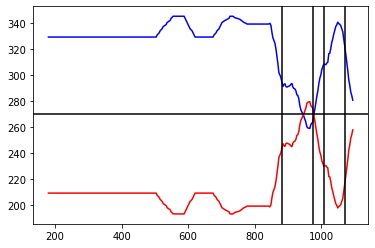

In [242]:
plt.plot(votes_timeline_df['times'] / 28800.0, votes_timeline_df['votes_timeline'].rolling(10).mean(), color="blue")
plt.plot(votes_timeline_df['times'] / 28800.0, 538 - votes_timeline_df['votes_timeline'].rolling(10).mean(), color="red")
plt.axhline(y=270, color="black", linestyle="-")
#Don't know what happened, needs further investigation
#Seems to be when polling starts to ramp up
plt.axvline(x=(datetime.fromisoformat('2016-08-26').timestamp() - min_start_date) / 28800, color="black", linestyle="-")
#First presidential debate
plt.axvline(x=(datetime.fromisoformat('2016-09-26').timestamp() - min_start_date) / 28800, color="black", linestyle="-")
#Access Hollywood tapes
plt.axvline(x=(datetime.fromisoformat('2016-10-07').timestamp() - min_start_date) / 28800, color="black", linestyle="-")
#Comey investigation
plt.axvline(x=(datetime.fromisoformat('2016-10-28').timestamp() - min_start_date) / 28800, color="black", linestyle="-")

In [243]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
inv_code = {v: k for k, v in code.items()}
new_state_results = {}
for state in states_results.keys():
    if state != "U.S." and "CD" not in state:
        new_state_results[code[state]] = states_results[state]
states_results = new_state_results.copy()
states_results

{'AL': 0.37272632008688067,
 'AK': 0.4673618332325217,
 'AZ': 0.4630182735309084,
 'AR': 0.28850985183324074,
 'CA': 0.7435808755417384,
 'CO': 0.5523925784364969,
 'CT': 0.5565022608387419,
 'DE': 0.6331145253235567,
 'DC': 0.56648571286571,
 'FL': 0.48230022200142963,
 'GA': 0.3833816653207849,
 'HI': 0.9031920413522576,
 'ID': 0.44135470611704297,
 'IL': 0.5649250978780951,
 'IN': 0.4593695730086389,
 'IA': 0.5046818175204455,
 'KS': 0.48230584018977474,
 'KY': 0.39640491620844454,
 'LA': 0.3846465077876233,
 'ME': 0.5424425533513627,
 'MD': 0.6832102304425008,
 'MA': 0.6798540945485236,
 'MI': 0.510464296073528,
 'MN': 0.57434879403693,
 'MS': 0.4068822884661225,
 'MO': 0.4450761220658852,
 'MT': 0.4572294832291218,
 'NE': 0.37967718029192576,
 'NV': 0.5083798349570972,
 'NH': 0.5842594898323353,
 'NJ': 0.6046088109173343,
 'NM': 0.583465029283655,
 'NY': 0.626517992057867,
 'NC': 0.4851124901482037,
 'ND': 0.3581910391774168,
 'OH': 0.4615231115470928,
 'OK': 0.39179046363049896,


In [244]:
winner = {}
for state in states_results.keys():
    winner[state] = (states_results[state] > 0.5) + 0 
winner

{'AL': 0,
 'AK': 0,
 'AZ': 0,
 'AR': 0,
 'CA': 1,
 'CO': 1,
 'CT': 1,
 'DE': 1,
 'DC': 1,
 'FL': 0,
 'GA': 0,
 'HI': 1,
 'ID': 0,
 'IL': 1,
 'IN': 0,
 'IA': 1,
 'KS': 0,
 'KY': 0,
 'LA': 0,
 'ME': 1,
 'MD': 1,
 'MA': 1,
 'MI': 1,
 'MN': 1,
 'MS': 0,
 'MO': 0,
 'MT': 0,
 'NE': 0,
 'NV': 1,
 'NH': 1,
 'NJ': 1,
 'NM': 1,
 'NY': 1,
 'NC': 0,
 'ND': 0,
 'OH': 0,
 'OK': 0,
 'OR': 1,
 'PA': 1,
 'RI': 1,
 'SC': 0,
 'SD': 0,
 'TN': 0,
 'TX': 0,
 'UT': 0,
 'VT': 1,
 'VA': 1,
 'WA': 1,
 'WV': 0,
 'WI': 1,
 'WY': 0}

In [245]:
spec_ecr = {}
for state in ecr:
    if state != "U.S." and "CD" not in state:
        spec_ecr[state] = ecr[state]

In [246]:
results = pd.DataFrame({"States" : list(states_results.keys()), "Result" : list(states_results.values())})
winner_results = pd.DataFrame({"States" : list(winner.keys()), "Result" : list(winner.values())})
spec_ecr = []
for state in results['States']:
    spec_ecr.append(ecr[inv_code[state]])

In [247]:
codes = []
for state in results['States']:
    codes.append(inv_code[state])
results['State_code'] = codes
results

,States,Result,State_code
0,AL,0.372726,Alabama
1,AK,0.467362,Alaska
2,AZ,0.463018,Arizona
3,AR,0.288510,Arkansas
4,CA,0.743581,California
5,CO,0.552393,Colorado
6,CT,0.556502,Connecticut
7,DE,0.633115,Delaware
8,DC,0.566486,District of Columbia
9,FL,0.482300,Florida


In [248]:
import plotly.express as px

In [249]:
fig = px.choropleth(results, 
                    locationmode='USA-states', 
                    locations="States", 
                    color="Result", 
                    scope="usa",
                    color_continuous_scale = ["red", "white", "blue"],
                    range_color=(0, 1))
fig.show()

In [250]:
codes = []
for state in winner_results['States']:
    codes.append(inv_code[state])
winner_results['State_code'] = codes
results = []
for result in winner_results['Result']:
    if result == 0:
        results.append("Trump")
    else:
        results.append("Hillary")
winner_results["Result"] = results
winner_results

,States,Result,State_code
0,AL,Trump,Alabama
1,AK,Trump,Alaska
2,AZ,Trump,Arizona
3,AR,Trump,Arkansas
4,CA,Hillary,California
5,CO,Hillary,Colorado
6,CT,Hillary,Connecticut
7,DE,Hillary,Delaware
8,DC,Hillary,District of Columbia
9,FL,Trump,Florida


In [251]:
fig = px.choropleth(winner_results, 
                    locationmode='USA-states', 
                    locations="States", 
                    color="Result", 
                    scope="usa",
                    labels="Change of Hillary Clinton of winning the state in the electoral college",
                    color_discrete_map = {"Trump" : "red", "Hillary" : "blue"})
fig.show()

In [317]:
def map_date(df, date, date_type, column_c, column_t, min_grade = "ALL", continuous = True):
    all_poll_times = df.copy()
    date_formatted = datetime.fromisoformat(date).timestamp()
    
    grades = ["D-", "D", "D+", "C-", "C", "C+", "B-", "B", "B+", "A-", "A", "A+"]
    if min_grade != "ALL" and min_grade not in grades:
        raise Exception("Not valid grade")
    elif grades != "ALL":
        for grade in grades:
            if grade == min_grade:
                break
            all_poll_times = all_poll_times[(all_poll_times['grade'] != grade)]
            
    if not (date_type == 'startdate' or date_type == 'enddate'):
        raise Exception("NOT VALID DATE TYPE")
    if date_type == 'startdate':
        date_formatted -= min_start_date
        all_poll_times = all_poll_times[(all_poll_times['state'] != "U.S.") & (all_poll_times['startdate'] < date_formatted)].sort_values(by='startdate')['startdate'].unique()
    else:
        date_formatted -= min_end_date
        all_poll_times = all_poll_times[(all_poll_times['state'] != "U.S.") & (all_poll_times['enddate'] < date_formatted)].sort_values(by='enddate')['enddate'].unique()
    
    pbar = tqdm(total = len(all_poll_times), desc="Loading", position=0)
    new_elections = past_elections.copy()
    poll_range = 28800.0 * 7
    for time in all_poll_times:
        votes = 0
        new_df = df[df['enddate'] <= time]
        new_df = new_df[new_df['enddate'] > (time - poll_range)]
        for state in ecr.keys():
            current_df = new_df[new_df['state'] == state]
            clinton = current_df[column_c]
            trump = current_df[column_t]
            if len(clinton) > 1 and len(trump) > 1:
                mean = clinton.mean() - trump.mean()
                var = clinton.var() + trump.var()
                if var != 0:
                    prob = 1 - stats.norm.cdf(0, loc=mean, scale=var)
                    new_elections[state] = prob
        pbar.update(1)
    keys_to_remove = ['U.S.']
    for key in new_elections.keys():
        if 'CD' in key:
            keys_to_remove.append(key)
    for key in keys_to_remove:
        new_elections.pop(key)
    results_df = pd.DataFrame({"States" : list(new_elections.keys()), "Result" : list(new_elections.values())})
    
    states_code = []
    for state in results_df['States']:
        states_code.append(code[state])
    results_df['States'] = states_code
    if continuous:
        fig = px.choropleth(results_df, 
                    locationmode='USA-states', 
                    locations="States", 
                    color="Result", 
                    scope="usa",
                    color_continuous_scale = ["red", "white", "blue"],
                    range_color=(0, 1))
    else:
        winner = []
        for res in results_df['Result']:
            if res > 0.5:
                winner.append("Clinton")
            else:
                winner.append("Trump")
        results_df['Winner'] = winner
        fig = px.choropleth(results_df, 
                    locationmode='USA-states', 
                    locations="States", 
                    color="Winner", 
                    scope="usa",
                    color_discrete_map = {"Trump" : "red", "Clinton" : "blue"})
    fig.show()
    return results_df

In [364]:
results_df = map_date(data, '2016-10-30', 'startdate', 'rawpoll_clinton', 'rawpoll_trump', min_grade = "B-", continuous = True)

Loading: 100%|███████████████████████████████▊| 220/221 [00:02<00:00, 77.71it/s]

Loading: 100%|███████████████████████████████| 221/221 [00:02<00:00, 100.23it/s]


In [378]:
results_df = map_date(data, '2016-10-15', 'startdate', 'rawpoll_clinton', 'rawpoll_trump', min_grade = "C-", continuous = False)

Loading: 100%|███████████████████████████████▊| 221/222 [00:02<00:00, 88.77it/s]

Loading: 100%|███████████████████████████████| 222/222 [00:02<00:00, 104.02it/s]


In [314]:
data['grade'] != "B"

0        True
1       False
2        True
3       False
4        True
        ...  
4203     True
4204     True
4205    False
4206     True
4207     True
Name: grade, Length: 4208, dtype: bool

In [323]:
res = requests.get('https://web.archive.org/web/20161108055435/http://projects.fivethirtyeight.com/pollster-ratings/')

In [324]:
res.text

'<!DOCTYPE html><html lang="en"><head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>\n<script type="text/javascript">window.addEventListener(\'DOMContentLoaded\',function(){var v=archive_analytics.values;v.service=\'wb\';v.server_name=\'wwwb-app28.us.archive.org\';v.server_ms=2108;archive_analytics.send_pageview({});});</script>\n<script type="text/javascript" src="/_static/js/bundle-playback.js?v=1WaXNDFE" charset="utf-8"></script>\n<script type="text/javascript" src="/_static/js/wombat.js?v=txqj7nKC" charset="utf-8"></script>\n<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>\n<script type="text/javascript" src="/_static/js/ruffle.js"></script>\n<script type="text/javascript">\n  __wm.init("https://web.archive.org/web");\n  __wm.wombat("http://projects.fivethirtyeight.com/pollster-ratings/","20161108055435","https://web.archive.org/","web","/_static/",\n\t  

In [329]:
import re
res_values = []
for val in re.findall("<[^<>]*>([^<>]+)<[^<>]*>", res.text):
    if val.strip() != '\n' and len(val.strip()) > 0:
        res_values.append(val.strip())
res_values

["FiveThirtyEight's Pollster Ratings | FiveThirtyEight",
 'var trackingConfig = {\n  postId: "116763",\n  section: "politics",\n  primaryTag: "2016-election",\n  pageName: "pollster-ratings",\n  title: "FiveThirtyEight\'s Pollster Ratings",\n  author: "Nate Silver",\n  authorSlug: "silver_nate",\n  fullUrl: "https://web.archive.org/web/20161108055435/http://projects.fivethirtyeight.com/pollster-ratings/",\n  shortUrl: "https://web.archive.org/web/20161108055435/http://53eig.ht/20RxGxg",\n  twitterText: "FiveThirtyEight’s Pollster Ratings"\n}',
 "window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;\nga('create', 'UA-60673836-2', 'auto');",
 '2,467 captures',
 '05 Oct 2014 - 25 Sep 2023',
 'Oct',
 'Jan',
 '2014',
 '2017',
 'success',
 'fail',
 'COLLECTED BY',
 'Organization:',
 'Internet Archive',
 'Focused crawls are collections of frequently-updated webcrawl data from narrow (as opposed to broad or wide) web crawls, often focused on a single domain or subdom

In [331]:
res_values[41:]

['SurveyUSA',
 '763',
 '4.6',
 '90%',
 '-1.0',
 '-0.8',
 'A',
 'D+0.1',
 'YouGov',
 '707',
 '6.7',
 '93%',
 '-0.3',
 '+0.1',
 'B',
 'D+1.6',
 'Rasmussen Reports/',
 '657',
 '5.3',
 '79%',
 '+0.4',
 '+0.7',
 'C+',
 'R+2.0',
 'Zogby Interactive/',
 '465',
 '5.6',
 '78%',
 '+0.8',
 '+1.2',
 'C-',
 'R+0.8',
 'Mason-Dixon Polling &amp; Research, Inc.',
 '415',
 '5.2',
 '86%',
 '-0.4',
 '-0.2',
 'B+',
 'R+1.0',
 'Public Policy Polling',
 '383',
 '4.9',
 '82%',
 '-0.5',
 '-0.1',
 'B+',
 'R+0.2',
 'Research 2000',
 '279',
 '5.5',
 '88%',
 '+0.2',
 '+0.6',
 'F',
 '✖',
 'D+1.4',
 'American Research Group',
 '260',
 '7.6',
 '75%',
 '+0.6',
 '+0.7',
 'C+',
 'R+0.1',
 'Quinnipiac University',
 '169',
 '4.7',
 '87%',
 '-0.3',
 '-0.4',
 'A-',
 'R+0.7',
 'Marist College',
 '146',
 '5.4',
 '88%',
 '-0.8',
 '-0.8',
 'A',
 'R+0.7',
 'Harris Interactive',
 '135',
 '5.5',
 '86%',
 '+1.2',
 '+1.2',
 'C-',
 'R+1.5',
 'TCJ Research',
 '133',
 '6.4',
 '59%',
 '+3.2',
 '+3.0',
 'F',
 '✖',
 'R+4.5',
 'Strategic 

In [356]:
counter = 0
updated_poll_values = []
for val in res_values[41:]:
    if val == '✖':
        continue
    elif counter % 8 == 0:
        if counter != 0:
            updated_poll_values.append(current_poll_values)
        current_poll_values = {
            "pollster" : val
        }
    elif counter % 8 == 1:
        try:
            test = int(val)
            current_poll_values['polls analyzed'] = val
        except:
            current_poll_values['pollster'] += val
            counter -= 1
    elif counter % 8 == 2:
        current_poll_values['simple average error'] = val
    elif counter % 8 == 3:
        current_poll_values['races called correctly'] = val
    elif counter % 8 == 4:
        current_poll_values['advanced'] = val
    elif counter % 8 == 5:
        current_poll_values['predictive'] = val
    elif counter % 8 == 6:
        current_poll_values['538 grade'] = val
    elif counter % 8 == 7:
        if re.search('[D|R].\d+.\d+', val) != None:
            current_poll_values['mean-reverted bias'] = val
        else:
            current_poll_values['mean-reverted bias'] = None
            counter -= 1
    counter += 1
updated_poll_values

[{'pollster': 'SurveyUSA',
  'polls analyzed': '763',
  'simple average error': '4.6',
  'races called correctly': '90%',
  'advanced': '-1.0',
  'predictive': '-0.8',
  '538 grade': 'A',
  'mean-reverted bias': 'D+0.1'},
 {'pollster': 'YouGov',
  'polls analyzed': '707',
  'simple average error': '6.7',
  'races called correctly': '93%',
  'advanced': '-0.3',
  'predictive': '+0.1',
  '538 grade': 'B',
  'mean-reverted bias': 'D+1.6'},
 {'pollster': 'Rasmussen Reports/',
  'polls analyzed': '657',
  'simple average error': '5.3',
  'races called correctly': '79%',
  'advanced': '+0.4',
  'predictive': '+0.7',
  '538 grade': 'C+',
  'mean-reverted bias': 'R+2.0'},
 {'pollster': 'Zogby Interactive/',
  'polls analyzed': '465',
  'simple average error': '5.6',
  'races called correctly': '78%',
  'advanced': '+0.8',
  'predictive': '+1.2',
  '538 grade': 'C-',
  'mean-reverted bias': 'R+0.8'},
 {'pollster': 'Mason-Dixon Polling &amp; Research, Inc.',
  'polls analyzed': '415',
  'simple 

In [360]:
polls_df_updated = {}
for di in updated_poll_values:
    for key in di.keys():
        if key not in polls_df_updated.keys():
            polls_df_updated[key] = [di[key]]
        else:
            polls_df_updated[key] += [di[key]]
polls_df_updated = pd.DataFrame(polls_df_updated)
polls_df_updated.to_csv('Updated_poll_values.csv')
polls_df_updated

,pollster,polls analyzed,simple average error,races called correctly,advanced,predictive,538 grade,mean-reverted bias
0,SurveyUSA,763,4.6,90%,-1.0,-0.8,A,D+0.1
1,YouGov,707,6.7,93%,-0.3,+0.1,B,D+1.6
2,Rasmussen Reports/,657,5.3,79%,+0.4,+0.7,C+,R+2.0
3,Zogby Interactive/,465,5.6,78%,+0.8,+1.2,C-,R+0.8
4,"Mason-Dixon Polling &amp; Research, Inc.",415,5.2,86%,-0.4,-0.2,B+,R+1.0
...,...,...,...,...,...,...,...,...
321,Hampton University,1,3.5,100%,-1.8,+0.2,B,D+0.1
322,QEV Analytics,1,7.3,0%,-1.9,+0.2,B,D+0.1
323,University of Houston,1,2.0,100%,-6.6,+0.2,B,D+1.4
324,Vanderbilt University,1,8.9,100%,+0.5,-0.1,B+,D+0.0


In [341]:
counter = 0
updated_poll_values = {
    'pollster' : [],
    'polls analyzed' : [],
    'simple average error' : [],
    'races called correctly' : [],
    'advanced' : [],
    'predictive' : [],
    '538 grade' : [],
    'mean-reverted bias' : []
}
for val in res_values[41:]:
    if val == '✖':
        continue
    elif counter % 8 == 0:
        updated_poll_values['pollster'] += [val]
    elif counter % 8 == 1:
        try:
            test = int(val)
            updated_poll_values['polls analyzed'] += [val]
        except:
            
            updated_poll_values['pollster'][-1] += val
            counter -= 1
    elif counter % 8 == 2:
        updated_poll_values['simple average error'] += [val]
    elif counter % 8 == 3:
        updated_poll_values['races called correctly'] += [val]
    elif counter % 8 == 4:
        updated_poll_values['advanced'] += [val]
    elif counter % 8 == 5:
        updated_poll_values['predictive'] += [val]
    elif counter % 8 == 6:
        updated_poll_values['538 grade'] += [val]
    elif counter % 8 == 7:
        updated_poll_values['mean-reverted bias'] += [val]
    counter += 1
updated_poll_values

pollster 334
polls analyzed 333
simple average error 333
races called correctly 333
advanced 333
predictive 333
538 grade 333
mean-reverted bias 333


In [384]:
diff = {}
for key in past_elections.keys():
    diff[key] = past_elections[key] - past_elections["U.S."]
diff

{'U.S.': 0.0,
 'Alabama': -0.12700000000000006,
 'Alaska': -0.10250000000000004,
 'Arizona': -0.06470000000000004,
 'Arkansas': -0.14180000000000004,
 'California': 0.09179999999999999,
 'Colorado': 0.0042999999999999705,
 'Connecticut': 0.06999999999999995,
 'Delaware': 0.0754999999999999,
 'District of Columbia': 0.39849999999999997,
 'Florida': -0.010500000000000065,
 'Georgia': -0.05580000000000007,
 'Hawaii': 0.19489999999999996,
 'Idaho': -0.19020000000000004,
 'Illinois': 0.0653999999999999,
 'Indiana': -0.07130000000000003,
 'Iowa': 0.009299999999999975,
 'Kansas': -0.13010000000000005,
 'Kentucky': -0.13260000000000005,
 'Louisiana': -0.10480000000000006,
 'Maine': 0.052099999999999924,
 'Maine CD-1': 0.08509999999999995,
 'Maine CD-2': 0.018799999999999928,
 'Maryland': 0.10909999999999997,
 'Massachusetts': 0.09589999999999999,
 'Michigan': 0.03149999999999997,
 'Minnesota': 0.015899999999999914,
 'Mississippi': -0.07270000000000004,
 'Missouri': -0.06680000000000008,
 'Mont

In [390]:
data[data['state'] == 'U.S.'].reset_index(drop=True).dropna(subset=['grade'])

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,adjusted_raw_polls_clinton,adjusted_raw_polls_trump
0,U.S.,31359600.0,31446000.0,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN,47.00,43.00
1,U.S.,31186800.0,31536000.0,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN,38.13,35.59
2,U.S.,31273200.0,31446000.0,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN,40.20,40.80
3,U.S.,31446000.0,31536000.0,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN,45.00,41.00
4,U.S.,31359600.0,31446000.0,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN,47.00,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,U.S.,4579200.0,4752000.0,Ipsos,A-,514.0,lv,43.50,35.70,NaN,NaN,41.82758,35.22936,NaN,NaN,41.70,37.50
1098,U.S.,3369600.0,3542400.0,Ipsos,A-,876.0,lv,42.60,32.10,NaN,NaN,40.99447,31.25336,NaN,NaN,40.80,33.90
1099,U.S.,3283200.0,3456000.0,Ipsos,A-,620.0,lv,43.50,30.60,NaN,NaN,41.89856,29.72806,NaN,NaN,41.70,32.40
1100,U.S.,4492800.0,4665600.0,Ipsos,A-,250.0,lv,38.00,41.00,NaN,NaN,36.33124,40.50216,NaN,NaN,36.20,42.80


In [ ]:
def run_election_based_on_national_polls(data, date_type, min_grade, poll_clinton, diff, dropna_grades = False):
    df = data.copy()
    grades = ["D-", "D", "D+", "C-", "C", "C+", "B-", "B", "B+", "A-", "A", "A+"]
    for grade in grades:
        if grade == min_grade:
            break
        df = df[df['grade'] != grade]
    if dropna_grades:
        df = df.dropna(subset=['grade'])
    times = []
    evs_clinton = []
    